# NDVI Maxar Analysis Notebook 

## Environment

In [4]:
# 実行場所の設定
%cd /workspace

/workspace


## Maxar データ
https://www.maxar.com/constellation

## Import 

In [20]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## NDVI 

In [5]:
PATH_MAXAR = './maxar/20APR04014122-S2AS_R1C1-015150647030_01_P001.TIF'

img = tifffile.imread(PATH_MAXAR)

img.shape, img.dtype 

((4, 16384, 16384), dtype('uint16'))

In [8]:
# 型の変換
img = img.astype(np.float32)

In [9]:
# NaNの値を0に変換
img[np.isnan(img)] = 0
# 非負値に変換
img[img < 1.] = 1.

In [16]:
ndvi = (img[3, :, :] - img[2, :, :]) / (img[3, :, :] + img[2, :, :])

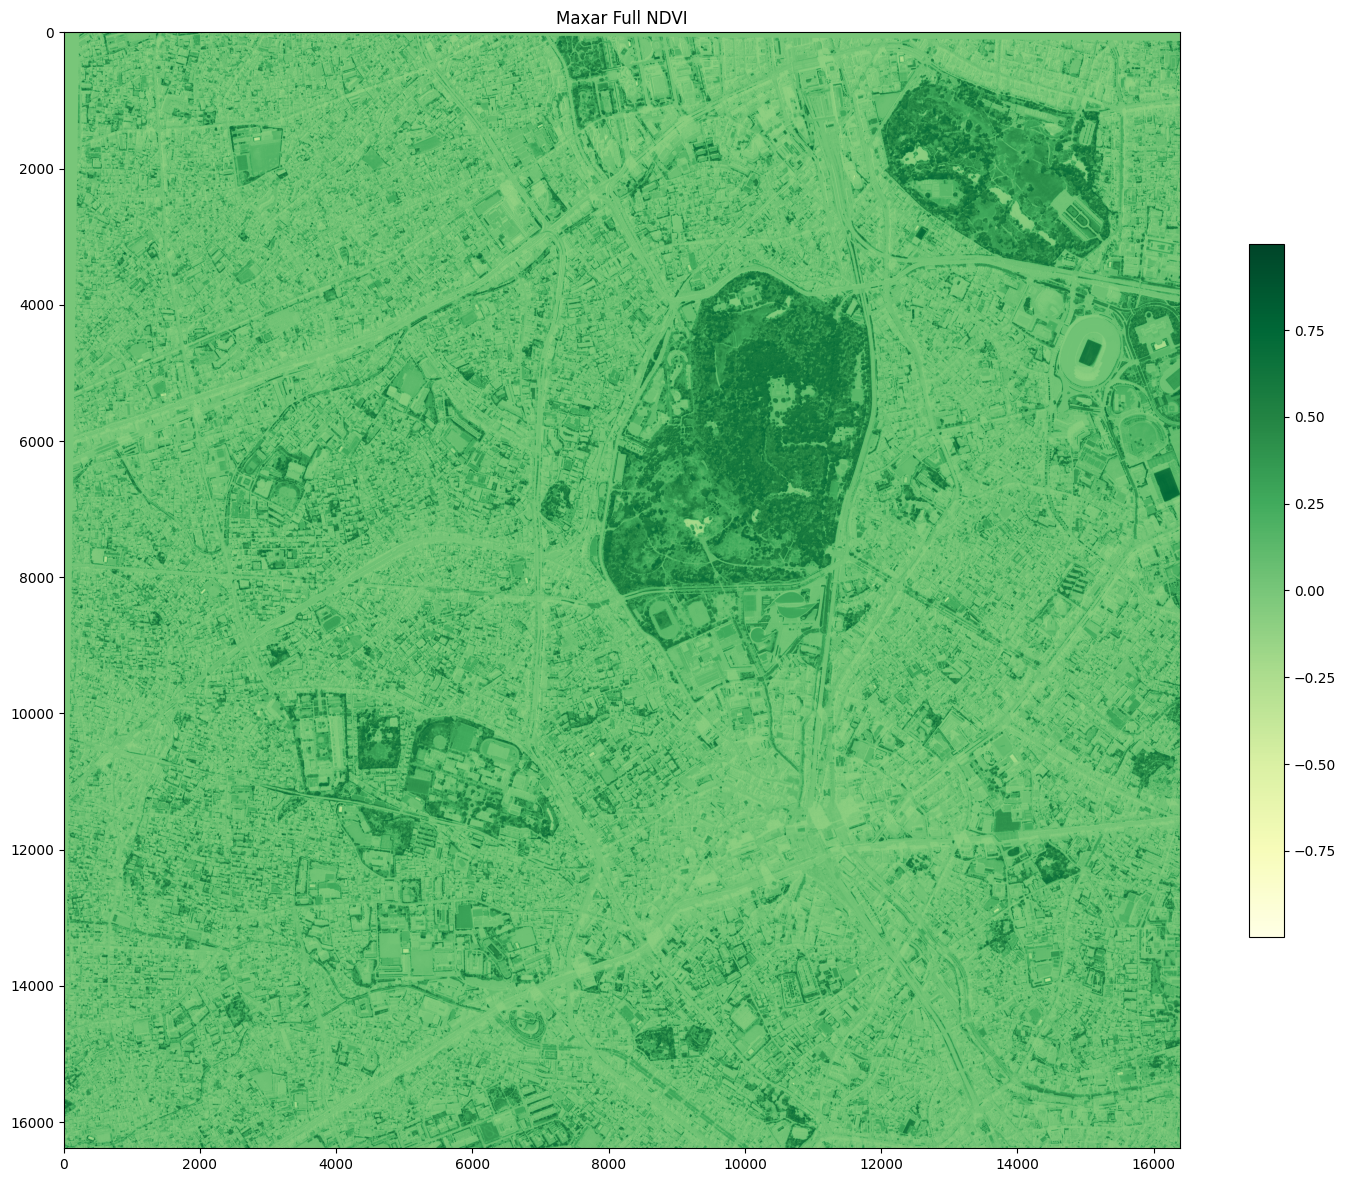

In [17]:
plt.figure(figsize=(18, 18))
plt.title('Maxar Full NDVI')
plt.imshow(ndvi, cmap='YlGn')
plt.colorbar(shrink=0.5)
plt.savefig('output/maxar_full_ndvi.png')
plt.show();
plt.clf()
plt.close()

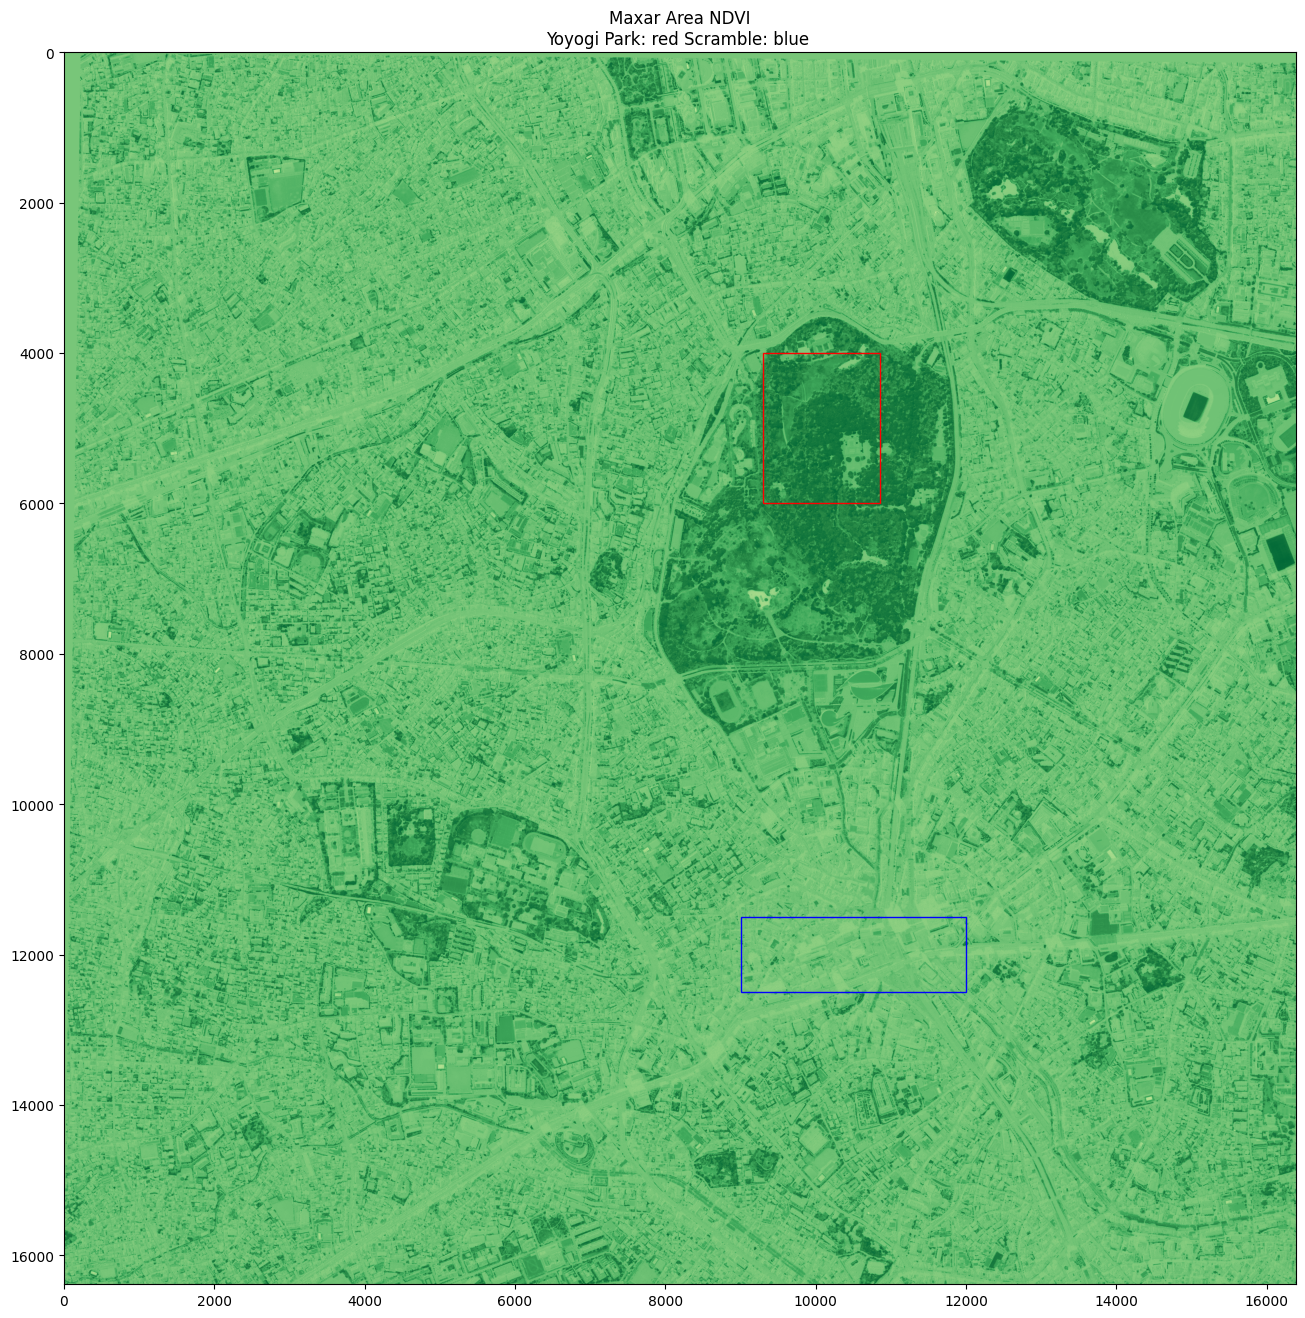

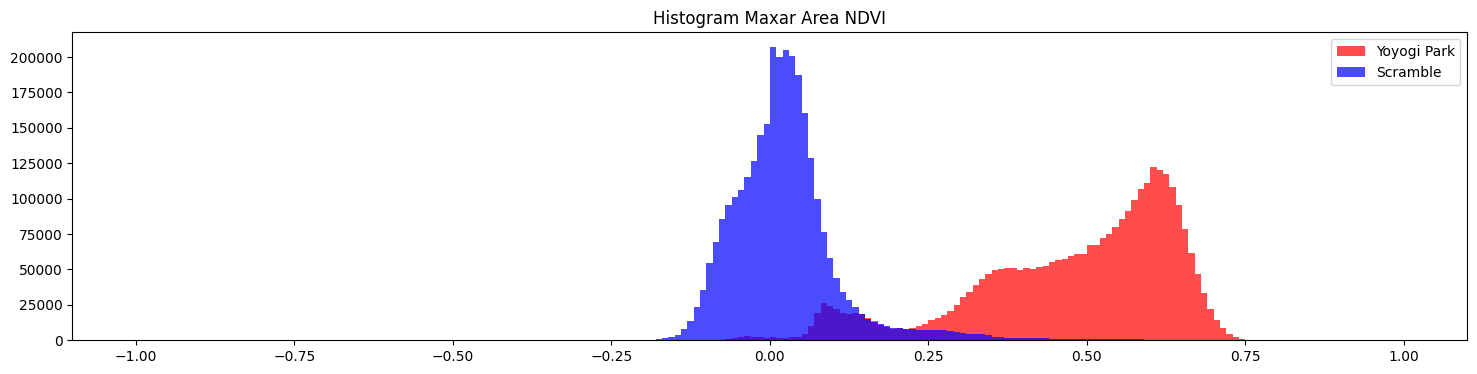

In [25]:
bboxes = [
    ((9300, 4000), (10850, 6000)),
    ((9000, 11500),  (12000, 12500) ),
    ]
names = ['Yoyogi Park', 'Scramble',]
colors = ['red', 'blue',]

title_usage_guide = "".join([f'{n}: {c} ' for n, c in zip(names, colors)])

plt.figure(figsize=(16, 16))
ax = plt.axes()
ax.set_title(f'Maxar Area NDVI\n{title_usage_guide}')
plt.imshow(ndvi, cmap='YlGn')

for i, (bbox, name, color) in enumerate(zip(bboxes, names, colors)):
    p = patches.Rectangle(xy=(
        bbox[0][0], bbox[0][1]
        ), 
            width=bbox[1][0] - bbox[0][0], 
            height=bbox[1][1] - bbox[0][1]
            , color=color, fill=False)
    ax.add_patch(p)
plt.savefig('output/maxar_area_ndvi.png')
plt.show();
plt.clf()
plt.close()

plt.figure(figsize=(18, 4))
plt.title('Histogram Maxar Area NDVI')
for i, (bbox, name, color) in enumerate(zip(bboxes, names, colors)):
    plt.hist(ndvi[
        bbox[0][1]:bbox[1][1], bbox[0][0]:bbox[1][0]
        ].ravel(), 
             bins=200, range=(-1, 1), 
             label=name, color=color,
             alpha=0.7)
plt.legend()
plt.savefig('output/maxar_hist_area_ndvi.png')
plt.show();
plt.clf()
plt.close()